<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/transformaciones_ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Transformaciones y ajustes
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 18 de septiembre 2024 <br>

* * *

<br>
<br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp

In [3]:
data = pd.read_excel("/content/drive/MyDrive/series_tiempo/Assets/remesas banxico.xlsx")
data.index = pd.to_datetime(data['Fecha'])
del data['Fecha']
data = pd.Series(data = data.Value, index=data.index)

In [4]:
data.var()

1726564.985392576

In [8]:
data.std()

1313.9881983460034

In [13]:
data.skew()

0.9010977692150215

In [19]:
sp.stats.skew(data, bias=False), sp.stats.skew(data)

(0.9010977692150215, 0.897209067296803)

<Axes: >

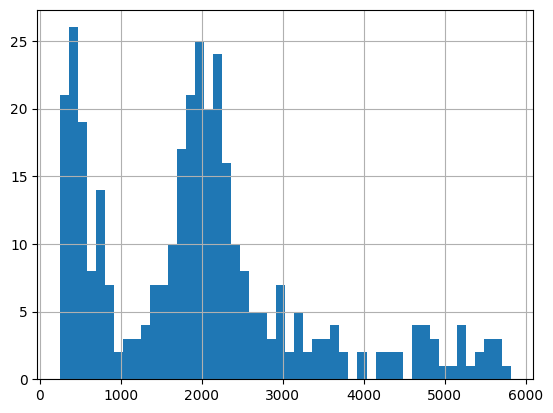

In [11]:
data.hist(bins=50)

<Axes: xlabel='Fecha'>

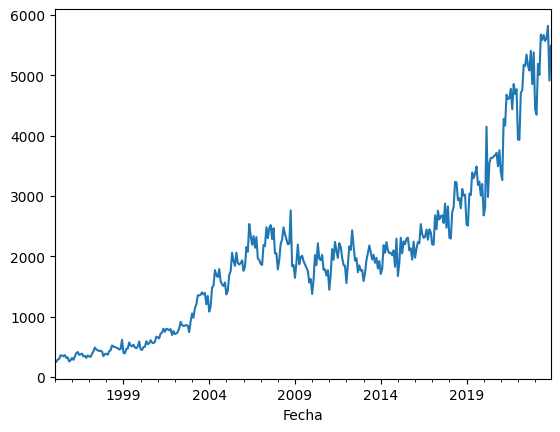

In [21]:
data.plot()

# Transformaciones y ajustes

A menudo, el ajuste de los datos históricos puede dar lugar a series de tiempo más sencillas.

El objetivo de estos ajustes y transformaciones es simplificar los patrones de los datos históricos eliminando las fuentes de variación conocidas o haciendo que el patrón sea más coherente en todo el conjunto de datos. Las pautas más simples suelen ser más fáciles de modelizar y conducen a previsiones más precisas.

Matemáticamente una variable más sencilla tiene una variación más pequeña, sesgo cercado a 0, sin colas a la derecha o izquierda de la distribución, sin valores atípicos, una magnitud similar; sin perder información valiosa.

Esto se puede lograr a partir de diferentes tranformaciones o ajustes. Vamos a analizar algunas.

Utiliza tu serie de tiempo. Decide que transformaciones y ajustes son mejores para tu variable.

Utiliza como comparación el sesgo (una distribución normal tiene sesgo 0) la varianza (o desviación estándar). Complementa visualmente con el histograma (o función de densidad de probabilidad)

## Elimina valores antiguos que no representan la actualidad

In [24]:
data["2010-01-01":].skew()

1.0036505806017944

In [25]:
data["2010-01-01":].std()

1178.0288133979175

<Axes: xlabel='Fecha'>

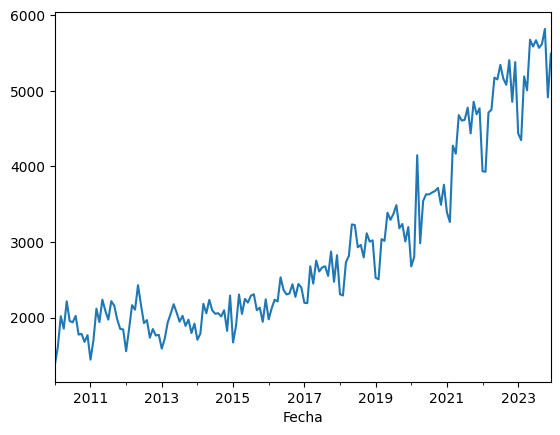

In [22]:
data["2010-01-01":].plot()

<Axes: >

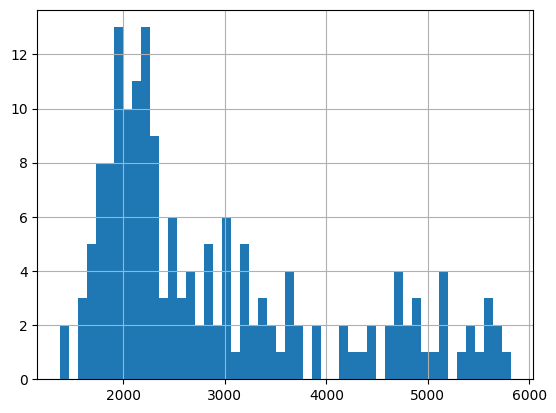

In [23]:
data["2010-01-01":].hist(bins=50)

## Diferenciación

In [26]:
data.diff().skew()

0.08320447474862315

<Axes: xlabel='Fecha'>

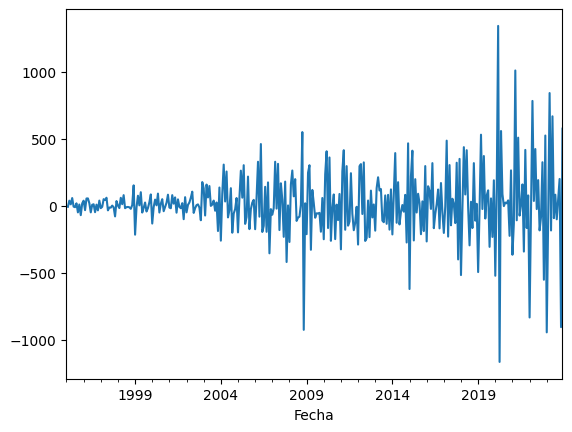

In [28]:
data.diff().plot()

<Axes: >

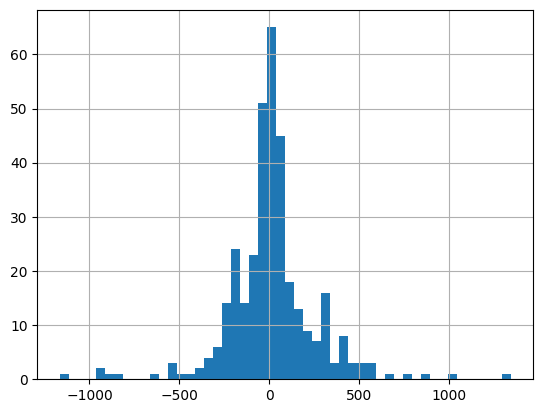

In [29]:
data.diff().hist(bins=50)

### Retornos

In [30]:
data.pct_change().skew()

0.25592768857911685

<Axes: xlabel='Fecha'>

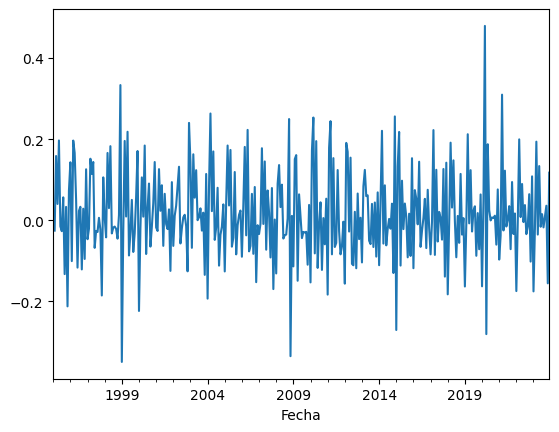

In [31]:
data.pct_change().plot()

<Axes: >

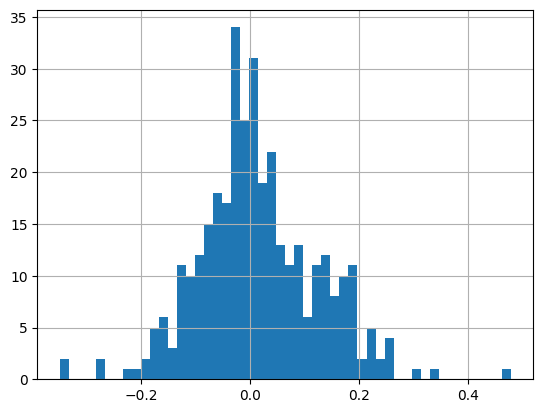

In [32]:
data.pct_change().hist(bins=50)

## Escalamiento y Desplazamiento

### Escalamiento valores máximo y mínimo

$$
Y=\frac{X-\min(X)}{\max(X)-\min(X)}
$$

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
mM=MinMaxScaler()
Z = mM.fit_transform(data.values.reshape(-1,1))

In [52]:
sp.stats.skew(Z, bias=False)

array([0.90109777])

In [53]:
Z.std()

0.23557520390497685

In [54]:
Z.mean()

0.31334266276101513

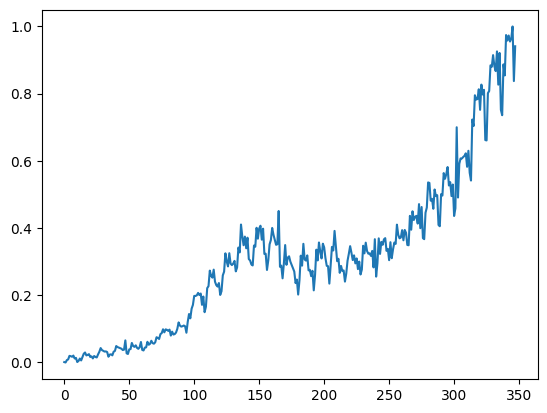

In [56]:
plt.plot(Z)

(array([21., 26., 19.,  8., 14.,  7.,  2.,  3.,  3.,  4.,  7.,  7., 10.,
        17., 21., 25., 20., 24., 16., 10.,  8.,  5.,  5.,  3.,  7.,  2.,
         5.,  2.,  3.,  3.,  4.,  2.,  0.,  2.,  0.,  2.,  2.,  2.,  0.,
         4.,  4.,  3.,  1.,  1.,  4.,  1.,  2.,  3.,  3.,  1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

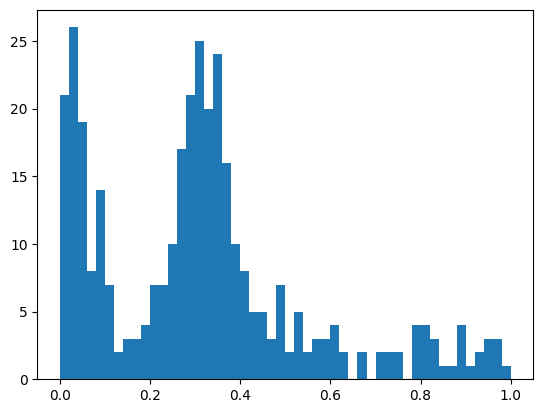

In [57]:
plt.hist(Z, bins=50)

### Desplazamiento

In [61]:
Z = Z + 1 # si quieres desplazar, en éste caso mayor a 1

In [59]:
sp.stats.skew(Z, bias=False)

array([0.90109777])

In [60]:
Z.std()

0.23557520390497685

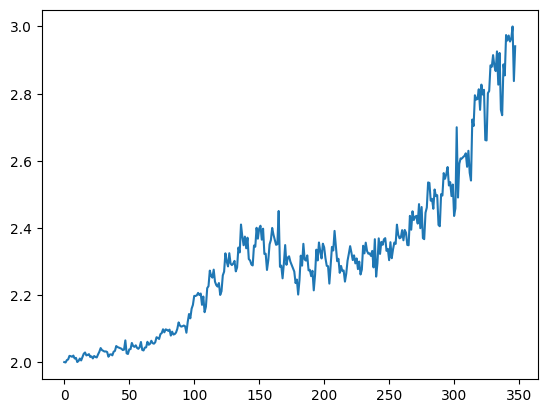

In [62]:
plt.plot(Z)

(array([21., 26., 19.,  8., 14.,  7.,  2.,  3.,  3.,  4.,  7.,  7., 10.,
        17., 21., 25., 20., 24., 16., 10.,  8.,  5.,  5.,  3.,  7.,  2.,
         5.,  2.,  3.,  3.,  4.,  2.,  0.,  2.,  0.,  2.,  2.,  2.,  0.,
         4.,  4.,  3.,  1.,  1.,  4.,  1.,  2.,  3.,  3.,  1.]),
 array([2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
        2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
        2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64,
        2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86,
        2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.  ]),
 <BarContainer object of 50 artists>)

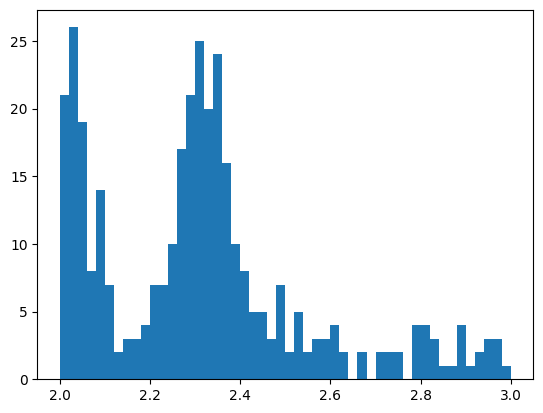

In [63]:
plt.hist(Z, bins=50)

## Estandarización

Estandarización
$$
Z=\frac{X-\bar{x}}{\sigma},
$$
donde $\bar{x}$ es la media aritmética del conjunto $X$ y $\sigma$ es su desviasión estándar.

In [33]:
from sklearn.preprocessing import StandardScaler

In [47]:
est = StandardScaler()
Z = est.fit_transform(data.values.reshape(-1,1))

In [40]:
sp.stats.skew(Z, bias=False)

array([0.90109777])

In [41]:
Z.std()

1.0

In [42]:
Z.mean()

0.0

In [ ]:
plt.plot(Z)

In [ ]:
plt.hist(Z, bins=50)

## Outliers

### Tres Desviaciones estándar

In [73]:
sum(np.abs(sp.stats.zscore(data)) > 3)

0

In [68]:
data[(np.abs(sp.stats.zscore(data)) < 3)]

,Value
Fecha,
1995-01-01,254.5724
1995-02-01,248.0605
1995-03-01,287.3645
1995-04-01,298.9135
1995-05-01,357.7396
...,...
2023-08-01,5568.2127
2023-09-01,5616.6566
2023-10-01,5817.8272


### Quartiles (tukey fence)

1.5 (o 3) veces el rango intercuartílico

In [74]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr

1655.53965

In [76]:
tabla=pd.DataFrame(index=["remesas"])
tabla['L_Inferior']=q1-1.5*iqr
tabla['L_superior']=q3+1.5*iqr
tabla

,L_Inferior,L_superior
remesas,-1685.47785,4936.68075


In [79]:
tabla=pd.DataFrame(index=["remesas"])
tabla['L_Inferior']=q1-3*iqr
tabla['L_superior']=q3+3*iqr
tabla

,L_Inferior,L_superior
remesas,-4168.787325,7419.990225


In [86]:
data[data > q3+1.5*iqr]

,Value
Fecha,
2022-05-01,5173.7153
2022-06-01,5150.2223
2022-07-01,5342.8370
2022-08-01,5160.1441
2022-09-01,5078.5862
2022-10-01,5404.6702
2022-12-01,5379.1316
2023-03-01,5189.7692
2023-04-01,5006.6693


{'whiskers': [<matplotlib.lines.Line2D at 0x7bb8ace6dba0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb8ace6de40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb8ace6e680>],
 'medians': [<matplotlib.lines.Line2D at 0x7bb8ace6f190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bb8ace6ee30>],
 'means': []}

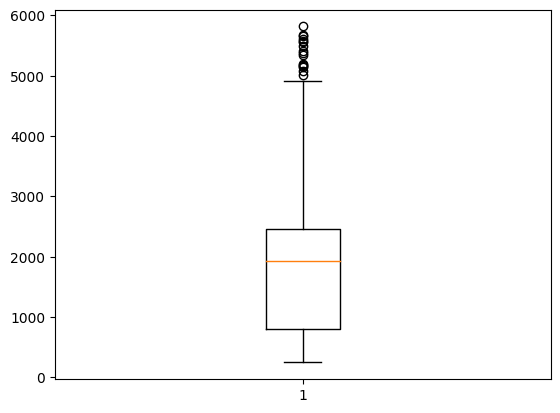

In [78]:
plt.boxplot(data)

Encuentra los valores atípicos usando el cambio porcentual de la serie o recortando la serie. ¿Llegas a la misma conclusión?

### sustitución de outliers

Después de encontrar los outliers, la labor es decidir que hacer con ellos. Puedes sustituir por la media, usar el periodo anterior, o el periodo estacional pasado.

In [ ]:
data[data > q3+3*iqr] = mean(data)

Existen otros métodos para detectar valores atípicos. Consulta más en:

https://scikit-learn.org/stable/modules/outlier_detection.html

### Fechas importantes

In [89]:
data.pct_change().sort_values()

,Value
Fecha,
1999-01-01,-0.349404
2008-11-01,-0.335203
2020-04-01,-0.280788
2015-01-01,-0.270649
2000-01-01,-0.223723
...,...
2004-03-01,0.263234
2021-03-01,0.309731
1998-12-01,0.333365


In [93]:
fecha_2001 = pd.Series(data = [1], index=["2001-01-01"])
fecha_2008 = pd.Series(data = [1], index=["2008-11-01"])
fecha_2020_3 = pd.Series(data = [1], index=["2020-03-01"])
fecha_2020_4 = pd.Series(data = [1], index=["2020-04-01"])

In [94]:
fecha_2020_4

,0
2020-04-01,1


## Transformaciones matemáticas

### Logaritmo natural (log)

In [96]:
np.log(data).skew()

-0.5944540507371142

In [97]:
np.log(data).std()

0.7978043793020752

<Axes: xlabel='Fecha'>

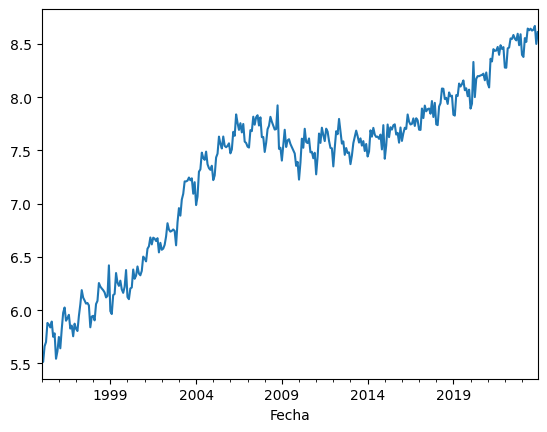

In [98]:
np.log(data).plot()

<Axes: >

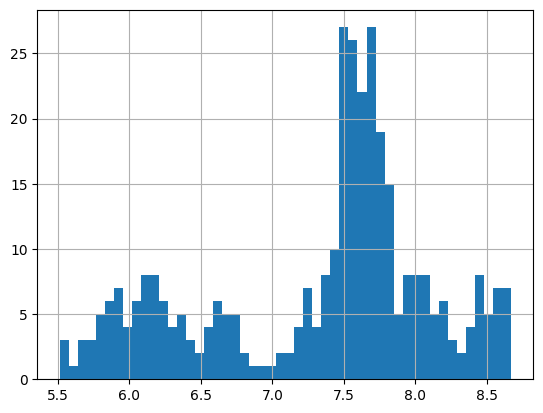

In [99]:
np.log(data).hist(bins=50)

### BoxCox

In [109]:
sp.stats.skew(sp.stats.boxcox(data)[0], bias=False)

-0.07970029477864202

In [108]:
np.std(sp.stats.boxcox(data)[0])

12.01876328682923

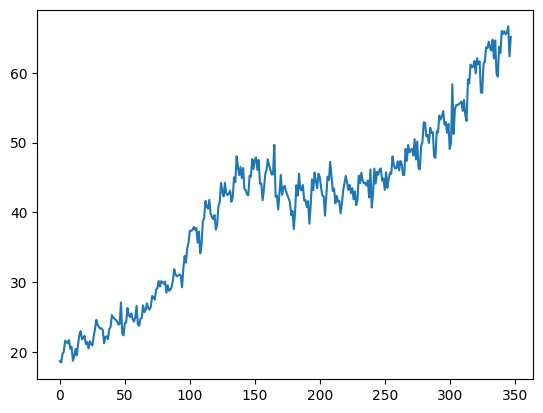

In [110]:
plt.plot(sp.stats.boxcox(data)[0])

(array([ 4.,  3., 10., 12.,  7., 11., 11.,  6.,  7.,  3.,  4.,  7.,  7.,
         4.,  1.,  1.,  1.,  4.,  0.,  7.,  4.,  7.,  6., 12., 24., 25.,
        18., 22., 24.,  8., 12.,  5.,  7.,  3.,  7.,  6.,  4.,  3.,  5.,
         1.,  2.,  2.,  2.,  3.,  7.,  3.,  6.,  2.,  4.,  4.]),
 array([18.49507686, 19.45826809, 20.42145931, 21.38465054, 22.34784177,
        23.311033  , 24.27422423, 25.23741546, 26.20060669, 27.16379792,
        28.12698915, 29.09018038, 30.05337161, 31.01656284, 31.97975406,
        32.94294529, 33.90613652, 34.86932775, 35.83251898, 36.79571021,
        37.75890144, 38.72209267, 39.6852839 , 40.64847513, 41.61166636,
        42.57485759, 43.53804881, 44.50124004, 45.46443127, 46.4276225 ,
        47.39081373, 48.35400496, 49.31719619, 50.28038742, 51.24357865,
        52.20676988, 53.16996111, 54.13315234, 55.09634356, 56.05953479,
        57.02272602, 57.98591725, 58.94910848, 59.91229971, 60.87549094,
        61.83868217, 62.8018734 , 63.76506463, 64.72825586,

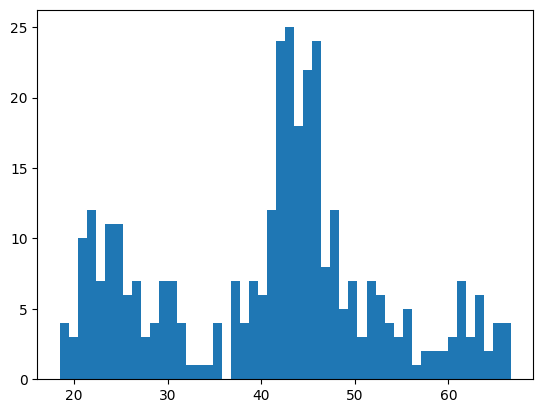

In [112]:
plt.hist(sp.stats.boxcox(data)[0], bins=50)

In [113]:
sp.stats.boxcox(data)[1] #lambda

0.3761733319183594